<a href="https://colab.research.google.com/github/grahamswanston/cap-comp215/blob/main/Copy_of_COMP_215_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GAME OF LIFE PATTERNS

Graham Swanston

March 1st, 2022

In [2]:
import json, requests
import matplotlib.pyplot as plt
from pprint import pprint
import os
import re
from genericpath import exists
import numpy as np


###Retrieving files

There are thousands of patterns possible in the game of life that are retrievable from the internet. The next code window retrieves these patterns and stores them for later use in a GoL simulation


In [3]:

""" BUILT OFF of Josephs in lab example"""


PATTERN_SITE = 'https://conwaylife.com/patterns'
PATTERNS = ('glider','lwss', 'mwss', 'hwss', '3-engine Cordership gun')

FOLDER = 'patterns'
if not os.path.exists(FOLDER):
  os.mkdir(FOLDER)

def getPatternFile(patternName):
  """ Loads the RLE file for the given pattern name from the PATTERN_SITE"""
  patternFile = '{name}.rle'.format(name = patternName)
  url = os.path.join(PATTERN_SITE, patternFile)
  response = requests.request("GET", url, headers={}, data={})
  with open(os.path.join(FOLDER, patternFile), 'w') as outfile:
    outfile.write(response.text)
  return patternFile

pattern_files = {
    pattern : getPatternFile(pattern) for pattern in PATTERNS
}

With the files retrieved, the RLE format they are stored in must be converted to a usable state for our simulation. The code below extracts the data related to the desired pattern and stores it in a dictionary keyed to its given name

In [4]:

#TODO
#---DONE---pull desired string out of open file
#---DONE---run an algorithm that converts string into string of 0s and 1s to be used in initial state creator for cell2D
def extract_RLE_string(name):
  """
  Retrives the rle format string for the initial cell states of desired pattern
  """

  with open(('/content/patterns/{name}.rle').format(name=name), 'r') as file:
    num_lines = sum(1 for line in file)
    if num_lines <= 6:
     file.seek(0, 0)
     pattern = file.readlines()[-1]
     return pattern
    else:
      print('error, file too long') #TODO add long file case
    return

extract_RLE_string('glider')

def RLE_to_add_cells(name):
  """
  read the input string and convert in to an np.array kernal to overlay into initail cell2D state
  """
  RLE_string = makeStrTrueLen(extract_RLE_string(name))
  RLE_string = RLE_string.replace('b', '0')
  RLE_string= RLE_string.replace('o', '1')
  RLE_string= RLE_string.replace('!', '')

  
  strParts = RLE_string.split('$')
  if len(strParts[0]) != len(strParts[-1]):
    strParts[-1] += '0'
  print(strParts)
  for i, s in enumerate(strParts):
    print(i,s)
  return strParts
    
  """
  # removed to simplify usage with Cell2D object, returns list of strings to use
  #with Cell2D.add_cells method

  array = np.zeros((len(strParts), len(strParts[0])), np.uint8)
 
  for i, s in enumerate(strParts):
    array[i] = [int(c) for c in s]
    print(s)
  print(array)
  """
#format retrieved string to remove digit stored repeated values
def makeStrTrueLen(s):
  s_list = list(s)
  #get index location of ints in s_list, store in num_location --DONE--
  numLocation = []
  for i in range(len(s_list)):
    if str(s_list[i]).isdigit() == True:
      numLocation.append(i)
  
  #read through num location, take value of int, char in s_list n+1 and 
  #replace the int in num location with (int-1)*char of n+1 
  counter = 0
  for counter in range(len(numLocation)):
    index = numLocation[counter]
    multiplyer = s_list[index]
    s_list[index] = s_list[index + 1] * (int(multiplyer) - 1)

  trueLenRLE = ''.join(s_list)
  print(trueLenRLE)

  return trueLenRLE


RLE_to_add_cells('glider')
RLE_to_add_cells('lwss')


bob$bbo$ooo!
['010', '001', '111']
0 010
1 001
2 111
bobbo$obbbb$obbbo$oooo!
['01001', '10000', '10001', '11110']
0 01001
1 10000
2 10001
3 11110


['01001', '10000', '10001', '11110']

In [5]:
"""
Copy of cell2D object from https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py
"""
if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py

if not os.path.exists('Cell2D.py'):
  !wget  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import decorate

from scipy.signal import correlate2d
from Cell2D import Cell2D

class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]


--2022-03-09 20:22:16--  https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2645 (2.6K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.58K  --.-KB/s    in 0s      

2022-03-09 20:22:16 (29.1 MB/s) - ‘utils.py’ saved [2645/2645]

--2022-03-09 20:22:16--  https://raw.githubusercontent.com/pearcej/complex-colab/master/notebooks/Cell2D.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2628 (2.6K) [text/plain]


### Test Rig for various Game of life States

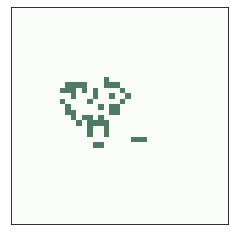

In [19]:
its_alive = Life(40,40)
its_alive.add_cells(10,2, *RLE_to_add_cells('glider'))
its_alive.add_cells(10,20, *RLE_to_add_cells('hwss'))
its_alive.add_cells(20,20, *RLE_to_add_cells('hwss'))



its_alive.animate(125, 0.2)